In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import random
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df = pd.read_csv(r"D:\MinorFinal\MovieDataS_self.csv")

In [3]:
df = df.drop_duplicates('Reviews')

In [4]:
df.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings
0,The Shawshank Redemption,1,100,The Shawshank Redemption holds the Number 1 sp...,10
1,The Shawshank Redemption,1,101,However delightful as it is The Shawshank Rede...,10
3,The Shawshank Redemption,1,104,"""The Shawshank Redemption"" is a cinematic gem ...",10
4,The Shawshank Redemption,1,105,"""Hope is a good thing probably best of all & g...",10
5,The Dark Night,2,106,"Confidently directed, dark, brooding, and pack...",10


In [5]:
df.shape

(99, 5)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Movie Name    0
Movie ID      0
User ID       0
Reviews       0
Ratings       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 100
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie Name  99 non-null     object
 1   Movie ID    99 non-null     int64 
 2   User ID     99 non-null     int64 
 3   Reviews     99 non-null     object
 4   Ratings     99 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 4.6+ KB


In [9]:
df.describe()

,Movie ID,User ID,Ratings
count,99.000000,99.000000,99.000000
mean,5.535354,114.161616,6.262626
std,2.876056,10.326019,3.448116
min,1.000000,100.000000,1.000000
25%,3.000000,106.000000,3.000000
50%,6.000000,112.000000,7.000000
75%,8.000000,122.000000,10.000000
max,10.000000,153.000000,10.000000


In [10]:
df[:5]

,Movie Name,Movie ID,User ID,Reviews,Ratings
0,The Shawshank Redemption,1,100,The Shawshank Redemption holds the Number 1 sp...,10
1,The Shawshank Redemption,1,101,However delightful as it is The Shawshank Rede...,10
3,The Shawshank Redemption,1,104,"""The Shawshank Redemption"" is a cinematic gem ...",10
4,The Shawshank Redemption,1,105,"""Hope is a good thing probably best of all & g...",10
5,The Dark Night,2,106,"Confidently directed, dark, brooding, and pack...",10


In [11]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
def text_prep(x: str) -> list:
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
     return lemmatize
preprocess_tag = [text_prep(i) for i in df['Reviews']]
df["preprocess_txt"] = preprocess_tag
df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg
df['sentiment'] = round((df['pos_count'] - df['neg_count']) / df['total_len'], 2)
df.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings,preprocess_txt,total_len,pos_count,neg_count,sentiment
0,The Shawshank Redemption,1,100,The Shawshank Redemption holds the Number 1 sp...,10,"[shawshank, redemption, hold, number, spot, to...",274,45,12,0.12
1,The Shawshank Redemption,1,101,However delightful as it is The Shawshank Rede...,10,"[however, delightful, shawshank, redemption, a...",303,45,23,0.07
3,The Shawshank Redemption,1,104,"""The Shawshank Redemption"" is a cinematic gem ...",10,"[shawshank, redemption, cinematic, gem, transc...",229,31,10,0.09
4,The Shawshank Redemption,1,105,"""Hope is a good thing probably best of all & g...",10,"[hope, good, thing, probably, best, good, thin...",160,18,18,0.00
5,The Dark Night,2,106,"Confidently directed, dark, brooding, and pack...",10,"[confidently, directed, dark, brooding, packed...",32,4,3,0.03


Text(0.5, 1.0, 'Ratings distribution')

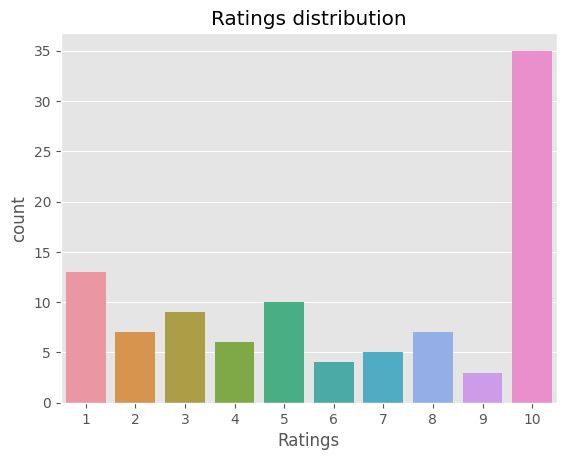

In [12]:
sns.countplot(x='Ratings', data=df)
plt.title("Ratings distribution")


In [13]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [14]:
df['word count'] = df['Reviews'].apply(no_of_words)
df.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings,preprocess_txt,total_len,pos_count,neg_count,sentiment,word count
0,The Shawshank Redemption,1,100,The Shawshank Redemption holds the Number 1 sp...,10,"[shawshank, redemption, hold, number, spot, to...",274,45,12,0.12,458
1,The Shawshank Redemption,1,101,However delightful as it is The Shawshank Rede...,10,"[however, delightful, shawshank, redemption, a...",303,45,23,0.07,671
3,The Shawshank Redemption,1,104,"""The Shawshank Redemption"" is a cinematic gem ...",10,"[shawshank, redemption, cinematic, gem, transc...",229,31,10,0.09,401
4,The Shawshank Redemption,1,105,"""Hope is a good thing probably best of all & g...",10,"[hope, good, thing, probably, best, good, thin...",160,18,18,0.00,291
5,The Dark Night,2,106,"Confidently directed, dark, brooding, and pack...",10,"[confidently, directed, dark, brooding, packed...",32,4,3,0.03,45


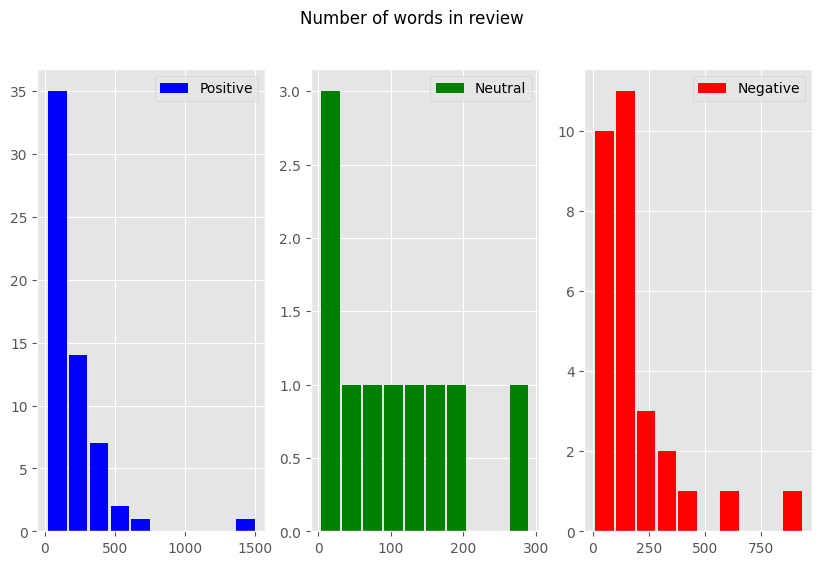

In [15]:
fig, ax = plt.subplots(1,3,figsize=(10,6))
ax[0].hist(df[df['sentiment'] > 0]['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 0]['word count'], label='Neutral', color='green', rwidth=0.9);
ax[1].legend(loc='upper right');
ax[2].hist(df[df['sentiment'] <0 ]['word count'], label='Negative', color='red', rwidth=0.9);
ax[2].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [16]:
nltk.download('stopwords')
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [17]:
df.Reviews = df['Reviews'].apply(data_processing)
df.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings,preprocess_txt,total_len,pos_count,neg_count,sentiment,word count
0,The Shawshank Redemption,1,100,shawshank redemption holds number 1 spot top25...,10,"[shawshank, redemption, hold, number, spot, to...",274,45,12,0.12,458
1,The Shawshank Redemption,1,101,however delightful shawshank redemption allego...,10,"[however, delightful, shawshank, redemption, a...",303,45,23,0.07,671
3,The Shawshank Redemption,1,104,shawshank redemption cinematic gem transcends ...,10,"[shawshank, redemption, cinematic, gem, transc...",229,31,10,0.09,401
4,The Shawshank Redemption,1,105,hope good thing probably best good thing never...,10,"[hope, good, thing, probably, best, good, thin...",160,18,18,0.00,291
5,The Dark Night,2,106,confidently directed dark brooding packed impr...,10,"[confidently, directed, dark, brooding, packed...",32,4,3,0.03,45


In [18]:
stemmer = PorterStemmer() #not worked
def stem_sentence(sentence):
   return [stemmer.stem(word) for word in sentence]



In [19]:
# Apply the function to the review column of the dataframe
df['stem_new'] = df['preprocess_txt'].apply(lambda x: stem_sentence(x))
df[:5]

,Movie Name,Movie ID,User ID,Reviews,Ratings,preprocess_txt,total_len,pos_count,neg_count,sentiment,word count,stem_new
0,The Shawshank Redemption,1,100,shawshank redemption holds number 1 spot top25...,10,"[shawshank, redemption, hold, number, spot, to...",274,45,12,0.12,458,"[shawshank, redempt, hold, number, spot, top, ..."
1,The Shawshank Redemption,1,101,however delightful shawshank redemption allego...,10,"[however, delightful, shawshank, redemption, a...",303,45,23,0.07,671,"[howev, delight, shawshank, redempt, allegori,..."
3,The Shawshank Redemption,1,104,shawshank redemption cinematic gem transcends ...,10,"[shawshank, redemption, cinematic, gem, transc...",229,31,10,0.09,401,"[shawshank, redempt, cinemat, gem, transcend, ..."
4,The Shawshank Redemption,1,105,hope good thing probably best good thing never...,10,"[hope, good, thing, probably, best, good, thin...",160,18,18,0.00,291,"[hope, good, thing, probabl, best, good, thing..."
5,The Dark Night,2,106,confidently directed dark brooding packed impr...,10,"[confidently, directed, dark, brooding, packed...",32,4,3,0.03,45,"[confid, direct, dark, brood, pack, impress, a..."


In [20]:
def no_of_wrds(text): 
    word_count = len(text)
    return word_count

In [21]:
df['wrd_cnt']=df['stem_new'].apply(lambda x: no_of_wrds(x))
df.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings,preprocess_txt,total_len,pos_count,neg_count,sentiment,word count,stem_new,wrd_cnt
0,The Shawshank Redemption,1,100,shawshank redemption holds number 1 spot top25...,10,"[shawshank, redemption, hold, number, spot, to...",274,45,12,0.12,458,"[shawshank, redempt, hold, number, spot, top, ...",274
1,The Shawshank Redemption,1,101,however delightful shawshank redemption allego...,10,"[however, delightful, shawshank, redemption, a...",303,45,23,0.07,671,"[howev, delight, shawshank, redempt, allegori,...",303
3,The Shawshank Redemption,1,104,shawshank redemption cinematic gem transcends ...,10,"[shawshank, redemption, cinematic, gem, transc...",229,31,10,0.09,401,"[shawshank, redempt, cinemat, gem, transcend, ...",229
4,The Shawshank Redemption,1,105,hope good thing probably best good thing never...,10,"[hope, good, thing, probably, best, good, thin...",160,18,18,0.00,291,"[hope, good, thing, probabl, best, good, thing...",160
5,The Dark Night,2,106,confidently directed dark brooding packed impr...,10,"[confidently, directed, dark, brooding, packed...",32,4,3,0.03,45,"[confid, direct, dark, brood, pack, impress, a...",32


Positive Reviews


In [22]:
pos_reviews =  df[df.sentiment > 0]
pos_reviews.tail()

,Movie Name,Movie ID,User ID,Reviews,Ratings,preprocess_txt,total_len,pos_count,neg_count,sentiment,word count,stem_new,wrd_cnt
87,A Space Odyssey,9,108,born 1968 year saw original release 2001 space...,4,"[born, year, saw, original, release, space, od...",136,11,8,0.02,250,"[born, year, saw, origin, releas, space, odyss...",136
88,A Space Odyssey,9,122,kubrick made great films also made drivel spac...,4,"[kubrick, made, great, film, also, made, drive...",63,6,4,0.03,109,"[kubrick, made, great, film, also, made, drive...",63
92,There Will Be Blood,10,108,compelling family drama charting one mans rise...,9,"[compelling, family, drama, charting, one, man...",74,11,6,0.07,123,"[compel, famili, drama, chart, one, man, rise,...",74
95,There Will Be Blood,10,119,blood fine film fact would go far say one best...,10,"[blood, fine, film, fact, would, go, far, say,...",91,18,8,0.11,166,"[blood, fine, film, fact, would, go, far, say,...",91
99,There Will Be Blood,10,128,think last significant movie saw featured dani...,3,"[think, last, significant, movie, saw, feature...",139,11,8,0.02,307,"[think, last, signific, movi, saw, featur, dan...",139


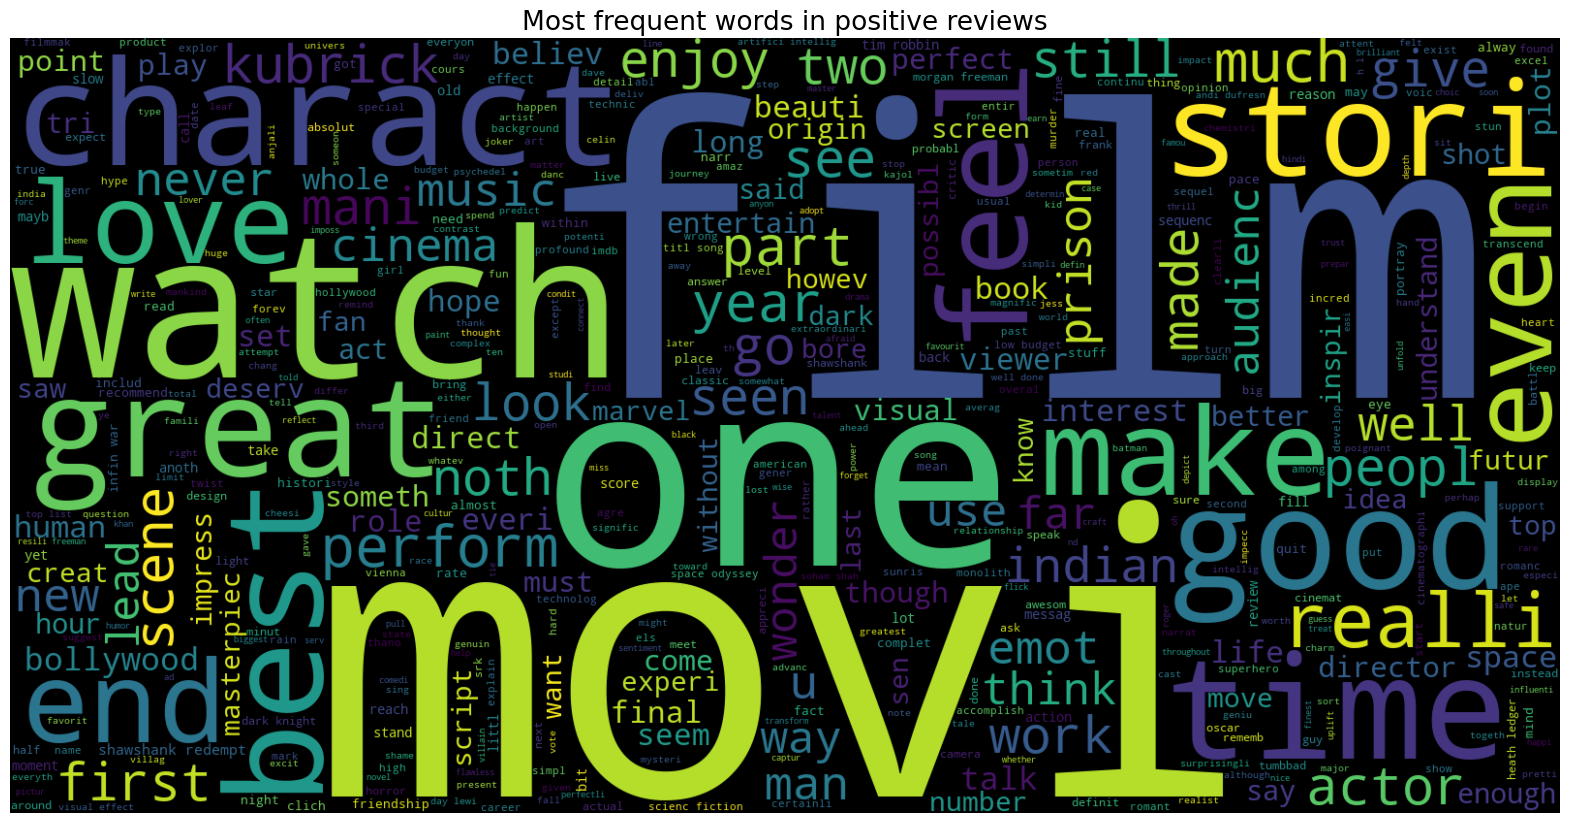

In [23]:
#visual representation of most frequent words in positive reviews 
text = ' '.join([str(word) for review in pos_reviews['stem_new'] for word in review])

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [24]:
stemmed_tokens = [word for review in pos_reviews['stem_new'] for word in review]

# Compute frequency distribution
freq_dist = nltk.FreqDist(stemmed_tokens)

# Print most common words
print(freq_dist.most_common(10))

[('film', 158), ('movi', 152), ('one', 52), ('watch', 51), ('like', 49), ('charact', 42), ('time', 41), ('good', 40), ('great', 39), ('best', 37)]


In [25]:
pos_words=pd.DataFrame(freq_dist.most_common(15))
pos_words.columns=['word','count']
pos_words.head()

,word,count
0,film,158
1,movi,152
2,one,52
3,watch,51
4,like,49


In [26]:
#ploting a bar graph for the positive words in the reviews
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')


Negative Reviews

In [27]:
neg_reviews =  df[df.sentiment < 0]
neg_reviews.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings,preprocess_txt,total_len,pos_count,neg_count,sentiment,word count,stem_new,wrd_cnt
10,The Dark Night,2,111,hard find wrong movie seems well crafted put t...,7,"[hard, find, wrong, movie, seems, well, crafte...",150,15,21,-0.04,299,"[hard, find, wrong, movi, seem, well, craft, p...",150
11,The Dark Night,2,112,rented netflix forced watch till end dreadful ...,7,"[rented, netflix, forced, watch, till, end, dr...",84,6,11,-0.06,169,"[rent, netflix, forc, watch, till, end, dread,...",84
14,The Dark Night,2,119,heath ledger great role joker doubt early depa...,2,"[heath, ledger, great, role, joker, doubt, ear...",30,2,3,-0.03,52,"[heath, ledger, great, role, joker, doubt, ear...",30
15,The Dark Night,2,124,story really bloated many characters showing f...,1,"[story, really, bloated, many, character, show...",41,1,4,-0.07,84,"[stori, realli, bloat, mani, charact, show, fa...",41
16,The Shawshank Redemption,1,107,finally decided see film reading good reviews ...,1,"[finally, decided, see, film, reading, good, r...",100,11,12,-0.01,202,"[final, decid, see, film, read, good, review, ...",100


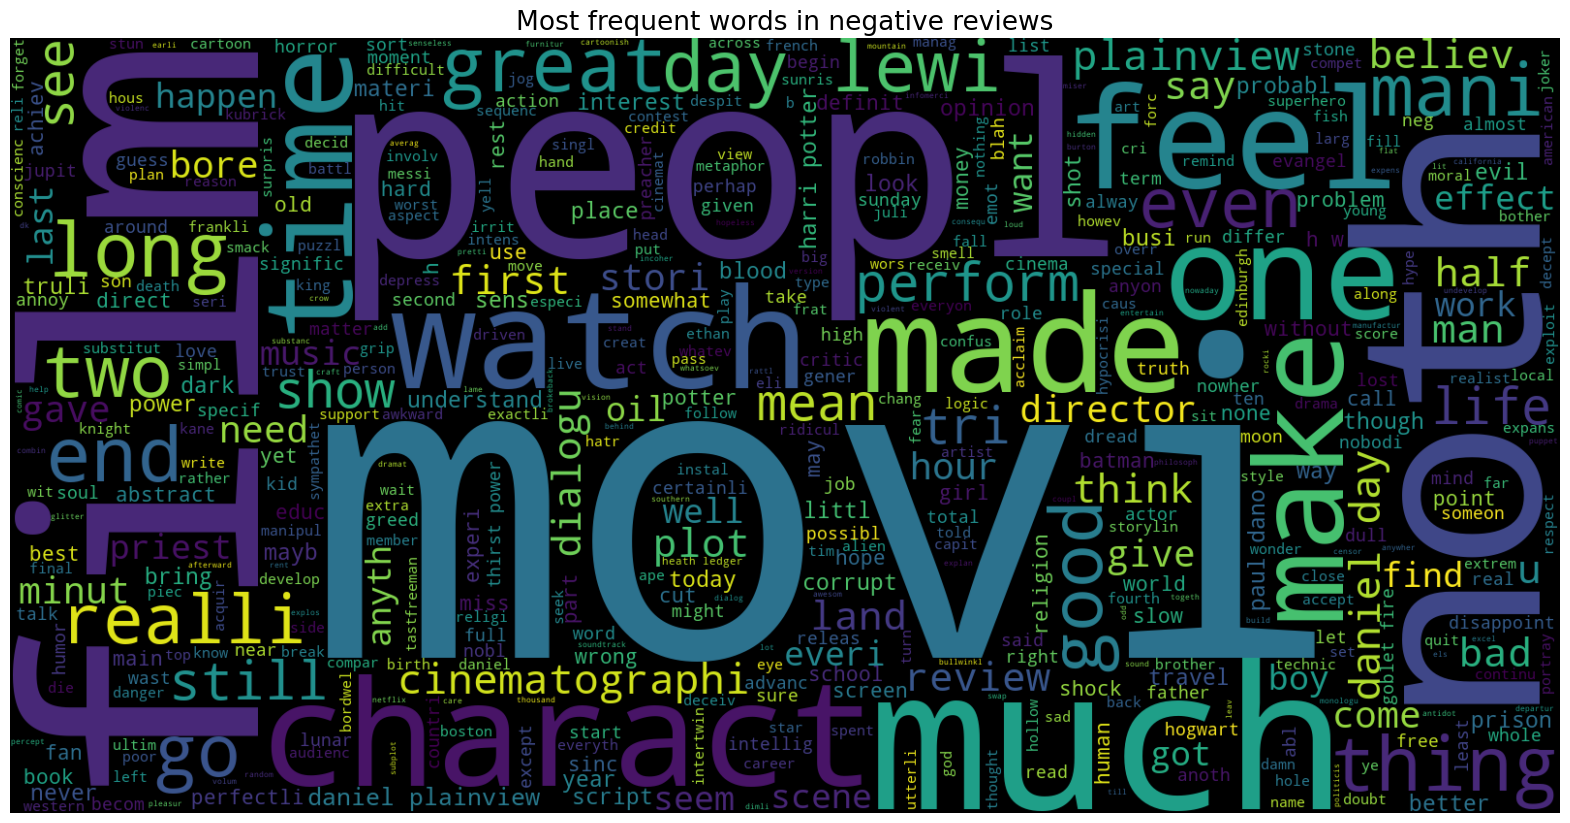

In [28]:
#visual representation of most frequent words in positive reviews 
text = ' '.join([str(word) for review in neg_reviews['stem_new'] for word in review])

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [29]:
stemmed_tokens = [word for review in neg_reviews['stem_new'] for word in review]

# Compute frequency distribution
freq_dist = nltk.FreqDist(stemmed_tokens)

# Print most common words
print(freq_dist.most_common(10))

[('movi', 71), ('film', 34), ('like', 25), ('peopl', 22), ('noth', 20), ('much', 20), ('charact', 19), ('watch', 17), ('feel', 17), ('daniel', 17)]


In [30]:
neg_words=pd.DataFrame(freq_dist.most_common(15))
neg_words.columns=['word','count']
neg_words[:10]

,word,count
0,movi,71
1,film,34
2,like,25
3,peopl,22
4,noth,20
5,much,20
6,charact,19
7,watch,17
8,feel,17
9,daniel,17


In [31]:
#ploting a bar graph for the positive words in the reviews
px.bar(neg_words, x='count', y='word', title='Common words in Negative reviews', color = 'word')


Neutral Reviews


In [32]:
neut_reviews =  df[df.sentiment == 0]
neut_reviews.tail()

,Movie Name,Movie ID,User ID,Reviews,Ratings,preprocess_txt,total_len,pos_count,neg_count,sentiment,word count,stem_new,wrd_cnt
52,Harry Potter and the Goblet of Fire,6,122,unfortunate much book needed cut time movie st...,10,"[unfortunate, much, book, needed, cut, time, m...",97,2,2,0.0,200,"[unfortun, much, book, need, cut, time, movi, ...",97
66,Before Sunrise,7,129,always come across scenes movie never got chan...,2,"[always, come, across, scene, movie, never, go...",34,3,3,0.0,68,"[alway, come, across, scene, movi, never, got,...",34
74,Tumbbad,8,143,hate indian movies theyre garbage terrible mea...,9,"[hate, indian, movie, garbage, terrible, mean,...",30,4,4,0.0,59,"[hate, indian, movi, garbag, terribl, mean, se...",30
79,Tumbbad,8,105,thought would watch movie seeing lot good revi...,2,"[thought, would, watch, movie, seeing, lot, go...",14,1,1,0.0,30,"[thought, would, watch, movi, see, lot, good, ...",14
90,A Space Odyssey,9,101,decided watch movie first time 53 years feel l...,2,"[decided, watch, movie, first, time, year, fee...",72,5,5,0.0,160,"[decid, watch, movi, first, time, year, feel, ...",72


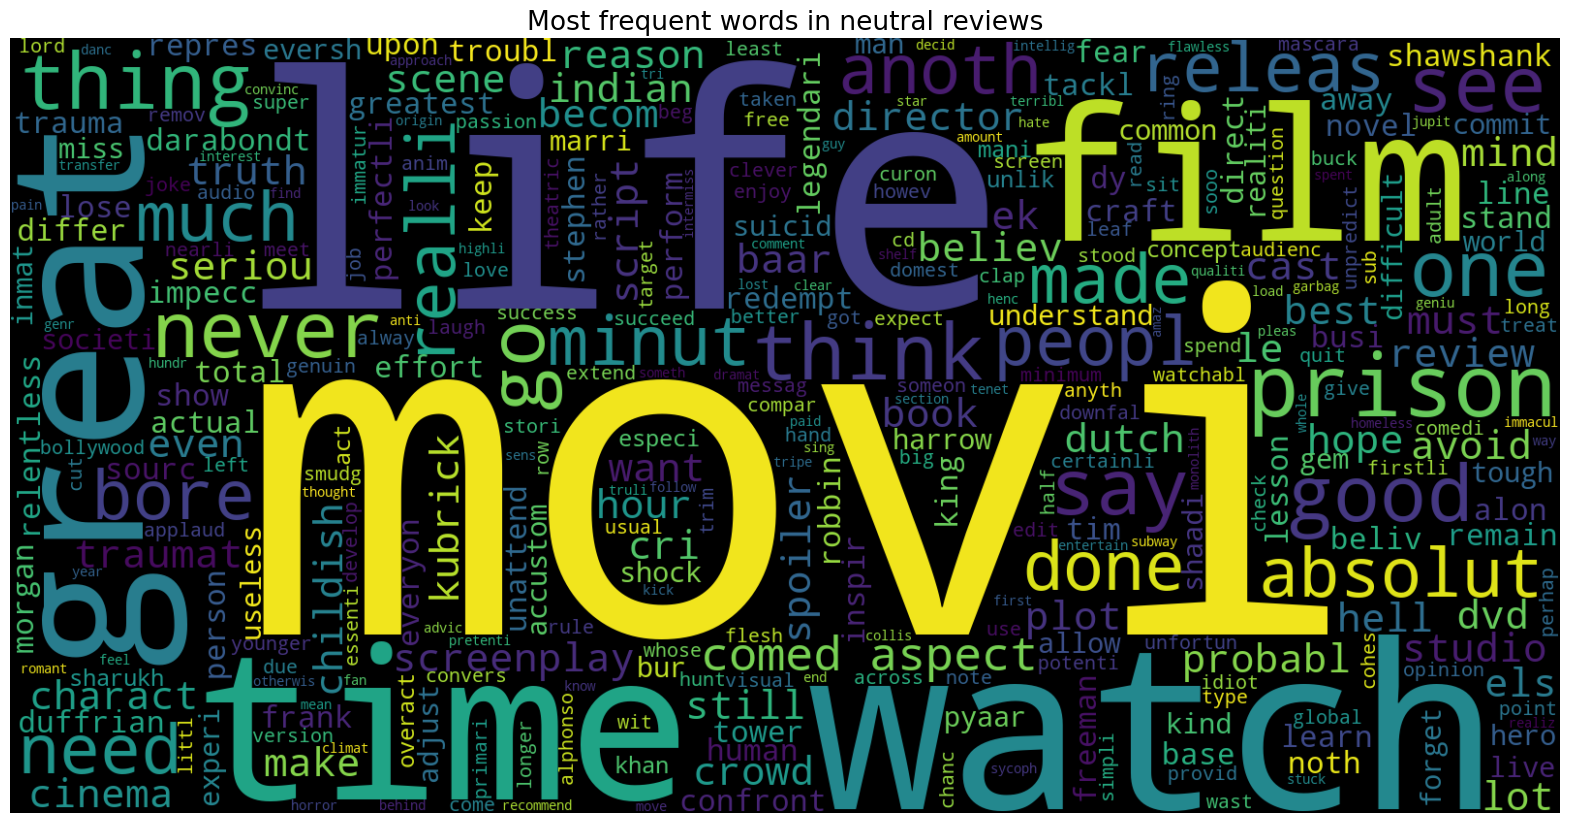

In [33]:
#visual representation of most frequent words in positive reviews 
text = ' '.join([str(word) for review in neut_reviews['stem_new'] for word in review])

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral reviews', fontsize = 19)
plt.show()

In [34]:
stemmed_tokens = [word for review in neut_reviews['stem_new'] for word in review]

# Compute frequency distribution
freq_dist = nltk.FreqDist(stemmed_tokens)

# Print most common words
print(freq_dist.most_common(10))

[('movi', 31), ('life', 12), ('watch', 11), ('time', 9), ('great', 7), ('film', 7), ('prison', 5), ('good', 4), ('thing', 4), ('never', 4)]


In [35]:
neut_words=pd.DataFrame(freq_dist.most_common(15))
neut_words.columns=['word','count']
neut_words[:10]

,word,count
0,movi,31
1,life,12
2,watch,11
3,time,9
4,great,7
5,film,7
6,prison,5
7,good,4
8,thing,4
9,never,4


In [36]:
#ploting a bar graph for the positive words in the reviews
px.bar(neut_words, x='count', y='word', title='Common words in Neutral reviews', color = 'word')


In [37]:
from sklearn.linear_model import LogisticRegression #is used to calculate and predict the probability of a binary event occuring 
from sklearn.naive_bayes import MultinomialNB #algorith to approach natural language processing 
from sklearn.svm import LinearSVC # it is to fit to the data you provide returning the best fit hyperplane that devides or categories, your data
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix # to calculate accuracy report 
import warnings #ignores any warning present 
warnings.filterwarnings("ignore")

In [38]:
def categorize_movie_rating(sentiment):
    if sentiment >0:
        return 3; #3 means positve rating
    elif sentiment == 0:
        return 2; #neutral
    else:
        return 1; #not liked rating
     

In [39]:
df['Sentiment_Ratings'] = df['sentiment'].apply(categorize_movie_rating)
df.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings,preprocess_txt,total_len,pos_count,neg_count,sentiment,word count,stem_new,wrd_cnt,Sentiment_Ratings
0,The Shawshank Redemption,1,100,shawshank redemption holds number 1 spot top25...,10,"[shawshank, redemption, hold, number, spot, to...",274,45,12,0.12,458,"[shawshank, redempt, hold, number, spot, top, ...",274,3
1,The Shawshank Redemption,1,101,however delightful shawshank redemption allego...,10,"[however, delightful, shawshank, redemption, a...",303,45,23,0.07,671,"[howev, delight, shawshank, redempt, allegori,...",303,3
3,The Shawshank Redemption,1,104,shawshank redemption cinematic gem transcends ...,10,"[shawshank, redemption, cinematic, gem, transc...",229,31,10,0.09,401,"[shawshank, redempt, cinemat, gem, transcend, ...",229,3
4,The Shawshank Redemption,1,105,hope good thing probably best good thing never...,10,"[hope, good, thing, probably, best, good, thin...",160,18,18,0.00,291,"[hope, good, thing, probabl, best, good, thing...",160,2
5,The Dark Night,2,106,confidently directed dark brooding packed impr...,10,"[confidently, directed, dark, brooding, packed...",32,4,3,0.03,45,"[confid, direct, dark, brood, pack, impress, a...",32,3


In [40]:
#Factorizing the data 
x = df['preprocess_txt']
y = df['Sentiment_Ratings']
vect = TfidfVectorizer()
x = vect.fit_transform(df['Reviews'])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.27,random_state=32)
print("Size of x_train is ",(x_train.shape))
print("Size of y_train is ",(y_train.shape))
print("Size of x_test is ",(x_test.shape))
print("Size of y_test is ",(y_test.shape))

Size of x_train is  (72, 3440)
Size of y_train is  (72,)
Size of x_test is  (27, 3440)
Size of y_test is  (27,)


In [41]:
#training the logistic regression models
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc= accuracy_score(logreg_pred,y_test)
print("Test Accuracy {:.2f}%".format(logreg_acc*100)) 

Test Accuracy 59.26%


In [42]:
#confusion matrix to define the performance of a classification algorithm
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 0  0 10]
 [ 0  0  1]
 [ 0  0 16]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         1
           3       0.59      1.00      0.74        16

    accuracy                           0.59        27
   macro avg       0.20      0.33      0.25        27
weighted avg       0.35      0.59      0.44        27



In [43]:
#predicts the tag of a text such as a piece of email or article
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 59.26%


In [44]:
#an algorith that attempts to find a hyperplane to maximize the distance between classified samples
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 59.26%


In [45]:
#confusion matrix using LinearSVC data values
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 0  0 10]
 [ 0  0  1]
 [ 0  0 16]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         1
           3       0.59      1.00      0.74        16

    accuracy                           0.59        27
   macro avg       0.20      0.33      0.25        27
weighted avg       0.35      0.59      0.44        27



correlation


In [46]:

df.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings,preprocess_txt,total_len,pos_count,neg_count,sentiment,word count,stem_new,wrd_cnt,Sentiment_Ratings
0,The Shawshank Redemption,1,100,shawshank redemption holds number 1 spot top25...,10,"[shawshank, redemption, hold, number, spot, to...",274,45,12,0.12,458,"[shawshank, redempt, hold, number, spot, top, ...",274,3
1,The Shawshank Redemption,1,101,however delightful shawshank redemption allego...,10,"[however, delightful, shawshank, redemption, a...",303,45,23,0.07,671,"[howev, delight, shawshank, redempt, allegori,...",303,3
3,The Shawshank Redemption,1,104,shawshank redemption cinematic gem transcends ...,10,"[shawshank, redemption, cinematic, gem, transc...",229,31,10,0.09,401,"[shawshank, redempt, cinemat, gem, transcend, ...",229,3
4,The Shawshank Redemption,1,105,hope good thing probably best good thing never...,10,"[hope, good, thing, probably, best, good, thin...",160,18,18,0.00,291,"[hope, good, thing, probabl, best, good, thing...",160,2
5,The Dark Night,2,106,confidently directed dark brooding packed impr...,10,"[confidently, directed, dark, brooding, packed...",32,4,3,0.03,45,"[confid, direct, dark, brood, pack, impress, a...",32,3


In [47]:
df['AverageRatings'] =df.groupby('User ID')['sentiment'].transform('mean')

In [48]:
df.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings,preprocess_txt,total_len,pos_count,neg_count,sentiment,word count,stem_new,wrd_cnt,Sentiment_Ratings,AverageRatings
0,The Shawshank Redemption,1,100,shawshank redemption holds number 1 spot top25...,10,"[shawshank, redemption, hold, number, spot, to...",274,45,12,0.12,458,"[shawshank, redempt, hold, number, spot, top, ...",274,3,0.083333
1,The Shawshank Redemption,1,101,however delightful shawshank redemption allego...,10,"[however, delightful, shawshank, redemption, a...",303,45,23,0.07,671,"[howev, delight, shawshank, redempt, allegori,...",303,3,0.022500
3,The Shawshank Redemption,1,104,shawshank redemption cinematic gem transcends ...,10,"[shawshank, redemption, cinematic, gem, transc...",229,31,10,0.09,401,"[shawshank, redempt, cinemat, gem, transcend, ...",229,3,0.016667
4,The Shawshank Redemption,1,105,hope good thing probably best good thing never...,10,"[hope, good, thing, probably, best, good, thin...",160,18,18,0.00,291,"[hope, good, thing, probabl, best, good, thing...",160,2,-0.088333
5,The Dark Night,2,106,confidently directed dark brooding packed impr...,10,"[confidently, directed, dark, brooding, packed...",32,4,3,0.03,45,"[confid, direct, dark, brood, pack, impress, a...",32,3,0.060000


In [49]:
# df1 set of 5 users and df2 set of 30
df1 = pd.DataFrame()
df2 = df[['Movie ID', 'User ID','sentiment','AverageRatings']].copy()
df1 = df2[84:89]

In [50]:
print(len(df1))
df1.head()

5


,Movie ID,User ID,sentiment,AverageRatings
86,9,121,-0.01,0.0300
87,9,108,0.02,0.0940
88,9,122,0.03,0.0225
89,9,116,-0.02,0.1425
90,9,101,0.00,0.0225


In [51]:
print(len(df2))
print(df2.to_markdown())

99
|     |   Movie ID |   User ID |   sentiment |   AverageRatings |
|----:|-----------:|----------:|------------:|-----------------:|
|   0 |          1 |       100 |        0.12 |      0.0833333   |
|   1 |          1 |       101 |        0.07 |      0.0225      |
|   3 |          1 |       104 |        0.09 |      0.0166667   |
|   4 |          1 |       105 |        0    |     -0.0883333   |
|   5 |          2 |       106 |        0.03 |      0.06        |
|   6 |          2 |       107 |        0.02 |     -0.0425      |
|   7 |          2 |       108 |        0.1  |      0.094       |
|   8 |          2 |       109 |        0.16 |      0.0866667   |
|   9 |          2 |       110 |        0.17 |      0.07        |
|  10 |          2 |       111 |       -0.04 |     -0.1         |
|  11 |          2 |       112 |       -0.06 |      1.15648e-18 |
|  12 |          2 |       113 |        0.13 |      0.0533333   |
|  13 |          2 |       114 |        0.06 |     -0.025       |
|  14 |

In [52]:
import math

In [53]:
# #function to find pearson correlation
# # no parameter to be passed since the function will be using values from df4,df5 which is specifically designed for data for single user 
# # x is the user provided in df4 and y is the user provided in df5

# def calculate_pearson_correlation():
#         # I'm not checking the condition len(x),len(y) >1 (since no negative ratings are present)
#         # Number of elements not checked margined to 3 for all
        
        
#         # mean of ratings of x and y
#         mean_x = dfset1['AverageRatings'].iloc[0]
#         mean_y = dfset2['AverageRatings'].iloc[0]
      
        
#         # substract mean of each element of both pair 
#         diff_x = []
#         # for loop to iterate through the column and return the ratings for user 1
#         for i in range(dfset1.shape[0]):
#                 result = dfset1['sentiment'].iloc[i]-dfset1['AverageRatings'].iloc[0]
#                 diff_x.append(result)
        

#         diff_y =[]
#         # for loop to iterate through the column and return the satings o
#         for i in range(dfset2.shape[0]):
#                 result = dfset2['sentiment'].iloc[i]-dfset2['AverageRatings'].iloc[0]
#                 diff_y.append(result)

        
#         # sum of the product of each pair of element from the two array
#         sum_product_diff = sum([diff_x[i] * diff_y[i] for i in range(1)])

        
#         # calculate the standard deviation of each array
        
#         std_x =[]
#         # for loop to iterate through the column and return the ratings for user 1
#         # for i in range(dfset1.shape[0]):
#         #         result = dfset1['sentiment'].iloc[i]
#         #         std_x.append(result)
#         # # print(std_x)
#         # standard_deviation_x = np.std(std_x)
#         for i in range(dfset1.shape[0]):
#                 result = dfset1['sentiment'].iloc[i]-dfset1['AverageRatings'].iloc[0]
#                 result *= result
#                 std_x.append(result)
        
#         l = sum(std_x[i] for i in range(1))
#         sd_x = math.sqrt(l)
        
#         std_y =[]
#         # # for loop to iterate through the column and return the ratings for user 2
#         for i in range(dfset2.shape[0]):
#                 result = dfset2['sentiment'].iloc[i]
#                 std_y.append(result)
#         # for i in range(dfset2.shape[0]):
#         #         result = dfset2['sentiment'].iloc[i]-dfset2['AverageRatings'].iloc[0]
#         #         result *= result
#         #         std_y.append(result)
        
#         # m = sum(std_y[i] for i in range(1))
#         # sd_y = math.sqrt(m)
        

#         # print(std_y)
#         standard_deviation_y = np.std(std_y)
#         # print(standard_deviation_x ,standard_deviation_y)

#         if sd_x == 0 or sd_y == 0:
#                 return 0;
#         else:
#         # calculate Pearson correlation
#                 pearson_correlation = sum_product_diff / sd_x / sd_y#*(len(std_x) - 1) 
#                 # if pearson_correlation > 1:
#                 #         n = random.uniform(0.90000,0.999999)
#                 #         return n
#                 # elif pearson_correlation < -1:
#                 #         n = random.uniform(-0.9000,-0.9999)
#                 #         return n
#                 # else:
#                 return pearson_correlation

In [54]:
#function to find pearson correlation
# no parameter to be passed since the function will be using values from df4,df5 which is specifically designed for data for single user 
# x is the user provided in df4 and y is the user provided in df5

def calculate_pearson_correlation():
        # I'm not checking the condition len(x),len(y) >1 (since no negative ratings are present)
        # Number of elements not checked margined to 3 for all
        
        
        # mean of ratings of x and y
        mean_x = dfset1['AverageRatings'].iloc[0] 
        mean_y = dfset2['AverageRatings'].iloc[0]
      
        
        # substract mean of each element of both pair 
        diff_x = []
        # for loop to iterate through the column and return the ratings for user 1
        for i in range(dfset1.shape[0]):
                result = dfset1['sentiment'].iloc[i]-dfset1['AverageRatings'].iloc[0]
                diff_x.append(result)
        diff_y =[]
        # for loop to iterate through the column and return the satings o
        for i in range(dfset2.shape[0]):
                result = dfset2['sentiment'].iloc[i]-dfset2['AverageRatings'].iloc[0]
                diff_y.append(result)

        
        # sum of the product of each pair of element from the two array
        sum_product_diff = sum([diff_x[i] * diff_y[i] for i in range(1)])

        
        # calculate the standard deviation of each array
        
        std_x =[]
        # for loop to iterate through the column and return the ratings for user 1
        for i in range(dfset1.shape[0]):
                result = dfset1['sentiment'].iloc[i]
                std_x.append(result)
        # print(std_x)
        standard_deviation_x = np.std(std_x)
        
        std_y =[]
        # for loop to iterate through the column and return the ratings for user 2
        for i in range(dfset2.shape[0]):
                result = dfset2['sentiment'].iloc[i]
                std_y.append(result)
        # print(std_y)
        standard_deviation_y = np.std(std_y)
        # print(standard_deviation_x ,standard_deviation_y)

        if standard_deviation_x == 0 or standard_deviation_y == 0:
                return 0;
        else:
        # calculate Pearson correlation
                pearson_correlation = sum_product_diff / (len(std_x) - 1) / standard_deviation_x / standard_deviation_y 
                if pearson_correlation > 1:
                        n = random.uniform(0.90000,0.999999)
                        return n
                elif pearson_correlation < -1:
                        n = random.uniform(-0.9000,-0.9999)
                        return n
                else:
                    return pearson_correlation
                

In [55]:
# dfset1 = df2.loc[df2['User ID'] == df1['User ID'].iloc[3], ['User ID', 'Movie ID','sentiment','AverageRatings']]
# print(dfset1)
# # for i in range(len(df2)):
# dfset2 = df2.loc[df2['User ID'] == df2['User ID'].iloc[1], ['User ID', 'Movie ID','sentiment','AverageRatings']]
# print(dfset2)
# x = calculate_pearson_correlation()
# print("pearson correaltion value is",x)


In [56]:
# dfset1 = df2.loc[df2['User ID'] == df1['User ID'].iloc[0], ['User ID', 'Movie ID','sentiment','AverageRatings']]
# dfset1.head()

In [57]:
# dfset2 = df2.loc[df2['User ID'] == df2['User ID'].iloc[i], ['User ID', 'Movie ID','sentiment','AverageRatings']]
# dfset2.head()

In [58]:
dfresult1 = pd.DataFrame(columns =['UserSet1','UserSet2','Movie ID','Sentiment_Ratings(userset2)','AverageSentiment','Coefficient'])
dfresult2 = pd.DataFrame(columns =['UserSet1','UserSet2','Movie ID','Sentiment_Ratings(userset2)','AverageSentiment','Coefficient'])
dfresult3 = pd.DataFrame(columns =['UserSet1','UserSet2','Movie ID','Sentiment_Ratings(userset2)','AverageSentiment','Coefficient'])
dfresult4 = pd.DataFrame(columns =['UserSet1','UserSet2','Movie ID','Sentiment_Ratings(userset2)','AverageSentiment','Coefficient'])
dfresult5 = pd.DataFrame(columns =['UserSet1','UserSet2','Movie ID','Sentiment_Ratings(userset2)','AverageSentiment','Coefficient'])
dfset1 = df2.loc[df2['User ID'] == df1['User ID'].iloc[0], ['User ID', 'Movie ID','sentiment','AverageRatings']]
dfset2 = df2.loc[df2['User ID'] == df1['User ID'].iloc[1], ['User ID', 'Movie ID','sentiment','AverageRatings']]
dfset3 = df2.loc[df2['User ID'] == df1['User ID'].iloc[2], ['User ID', 'Movie ID','sentiment','AverageRatings']]
dfset4 = df2.loc[df2['User ID'] == df1['User ID'].iloc[3], ['User ID', 'Movie ID','sentiment','AverageRatings']]
dfset5 = df2.loc[df2['User ID'] == df1['User ID'].iloc[4], ['User ID', 'Movie ID','sentiment','AverageRatings']]
for i in range(len(df2)):
    dfset2 = df2.loc[df2['User ID'] == df2['User ID'].iloc[i], ['User ID', 'Movie ID','sentiment','AverageRatings']]
    dfresult1.loc[i] = [dfset1['User ID'].iloc[0],df2['User ID'].iloc[i],df2['Movie ID'].iloc[i],df2['sentiment'].iloc[i],df2['AverageRatings'].iloc[i],calculate_pearson_correlation()]
    dfresult2.loc[i] = [dfset2['User ID'].iloc[0],df2['User ID'].iloc[i],df2['Movie ID'].iloc[i],df2['sentiment'].iloc[i],df2['AverageRatings'].iloc[i],calculate_pearson_correlation()]
    dfresult3.loc[i] = [dfset3['User ID'].iloc[0],df2['User ID'].iloc[i],df2['Movie ID'].iloc[i],df2['sentiment'].iloc[i],df2['AverageRatings'].iloc[i],calculate_pearson_correlation()]
    dfresult4.loc[i] = [dfset4['User ID'].iloc[0],df2['User ID'].iloc[i],df2['Movie ID'].iloc[i],df2['sentiment'].iloc[i],df2['AverageRatings'].iloc[i],calculate_pearson_correlation()]
    dfresult5.loc[i] = [dfset1['User ID'].iloc[0],df2['User ID'].iloc[i],df2['Movie ID'].iloc[i],df2['sentiment'].iloc[i],df2['AverageRatings'].iloc[i],calculate_pearson_correlation()]
 

In [59]:
dfset3.head()

,User ID,Movie ID,sentiment,AverageRatings
45,122,5,0.00,0.0225
52,122,6,0.00,0.0225
72,122,8,0.06,0.0225
88,122,9,0.03,0.0225


In [60]:
print(dfresult1.to_markdown())
print("------------------------------------------------------------------------------------------------------------------")
print(dfresult2.to_markdown())
print("------------------------------------------------------------------------------------------------------------------")
print(dfresult3.to_markdown())
print("------------------------------------------------------------------------------------------------------------------")
print(dfresult4.to_markdown())
print("------------------------------------------------------------------------------------------------------------------")
print(dfresult5.to_markdown())


|    |   UserSet1 |   UserSet2 |   Movie ID |   Sentiment_Ratings(userset2) |   AverageSentiment |   Coefficient |
|---:|-----------:|-----------:|-----------:|------------------------------:|-------------------:|--------------:|
|  0 |        121 |        100 |          1 |                          0.12 |        0.0833333   |     0.934728  |
|  1 |        121 |        101 |          1 |                          0.07 |        0.0225      |     0.943711  |
|  2 |        121 |        104 |          1 |                          0.09 |        0.0166667   |     0.620766  |
|  3 |        121 |        105 |          1 |                          0    |       -0.0883333   |     0.336002  |
|  4 |        121 |        106 |          2 |                          0.03 |        0.06        |    -0.430775  |
|  5 |        121 |        107 |          2 |                          0.02 |       -0.0425      |     0.837532  |
|  6 |        121 |        108 |          2 |                          0.1  |   

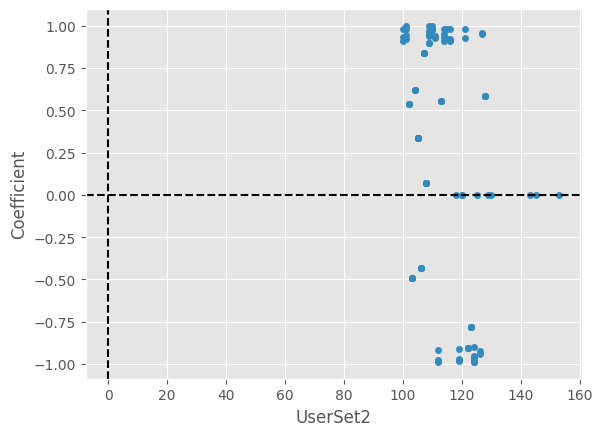

In [61]:
dfresult1.plot.scatter('UserSet2','Coefficient')
plt.axvline(0,c ='black',ls ="--")
plt.axhline(0,c ='black',ls ="--")
plt.show()